## How to process a very large dataset by chunks. 

* The way we proceed is that we load an image at a time and extract randomly 50 patches from this image. 
* Once we have accumulated 500 of these patches (using 10 images)
* we run the partial_fit method of the online KMeans object, MiniBatchKMeans.
* The verbose setting on the MiniBatchKMeans enables us to see that some clusters are reassigned during the successive calls to partial-fit. 
* This is because the number of patches that they represent has become too low, and it is better to choose a random new cluster.

In [52]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.feature_extraction.image import extract_patches_2d

### Load the data
* dataset of faces to learn a set of 20 x 20 images patches that constitute faces.

In [53]:
faces = datasets.fetch_olivetti_faces()

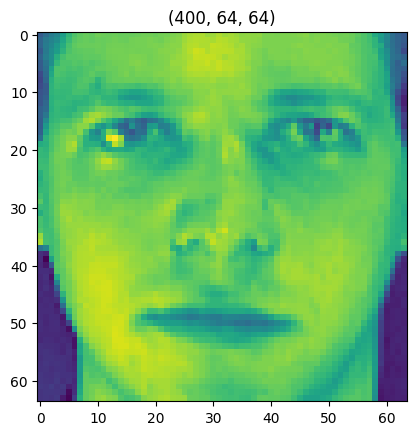

In [54]:
plt.title(f'{faces["images"].shape}')
plt.imshow(faces['images'][0]);

In [57]:
rng = np.random.RandomState(seed=42)
kmeans = MiniBatchKMeans(n_clusters=81, random_state=rng, n_init='auto', verbose=True)
patch_size = (20,20)
buffer = []
total_images = len(faces.images)

### The online learning part: cycle over the whole dataset 6 times

In [58]:
index = 0

print("Learning the dictionary... ")
for i in range(6):
    for img in faces.images:
        # extract #50 [20 x 20] patch  -- output (50, 20, 20) 
        patches = extract_patches_2d(img, patch_size=(20,20), max_patches=50, random_state=rng)
        # reshape (50, 20, 20)  --> (50, 400)
        patches = np.reshape(patches, (50, -1))
        # save the patches
        buffer.append(patches)
        # increment index
        index +=1

        # Once we have accumulated 500 of these patches (using 10 images) --> partial fit
        if index % 10 == 0:
            data = np.concatenate(buffer, axis=0)
            # standardize
            data = StandardScaler().fit_transform(data)
            # mean = np.mean(data, axis=0)
            # std = np.std(data, axis=0)
            # data = (data - mean) / std
            
            # partial fit
            kmeans.partial_fit(data)
            buffer = []
        if index % 100 == 0:
            print(f'Partial fit of {index} out of {6*total_images}')
            

    

Learning the dictionary... 
[MiniBatchKMeans] Reassigning 9 cluster centers.
[MiniBatchKMeans] Reassigning 8 cluster centers.
Partial fit of 100 out of 2400
[MiniBatchKMeans] Reassigning 5 cluster centers.
[MiniBatchKMeans] Reassigning 2 cluster centers.
Partial fit of 200 out of 2400
[MiniBatchKMeans] Reassigning 3 cluster centers.
[MiniBatchKMeans] Reassigning 1 cluster centers.
Partial fit of 300 out of 2400
[MiniBatchKMeans] Reassigning 3 cluster centers.
Partial fit of 400 out of 2400
Partial fit of 500 out of 2400
Partial fit of 600 out of 2400
Partial fit of 700 out of 2400
Partial fit of 800 out of 2400
Partial fit of 900 out of 2400
[MiniBatchKMeans] Reassigning 1 cluster centers.
Partial fit of 1000 out of 2400
Partial fit of 1100 out of 2400
Partial fit of 1200 out of 2400
Partial fit of 1300 out of 2400
Partial fit of 1400 out of 2400
Partial fit of 1500 out of 2400
Partial fit of 1600 out of 2400
Partial fit of 1700 out of 2400
Partial fit of 1800 out of 2400
Partial fit o

## Cluster center

In [61]:
print('Shape of cluster centers array :',kmeans.cluster_centers_.shape)

Shape of cluster centers array : (81, 400)


In [69]:
fig, ax = plt.subplots(nrows=9, ncols=9, figsize=(5,5))
ax = ax.ravel()
for i, patch in enumerate(kmeans.cluster_centers_):
    # reshape [400] --> [20 x 20]
    patch = np.reshape(patch, patch_size)
    # plot
    ax[i].imshow(patch, cmap=plt.cm.gray)
    ax[i].axis('off')
fig.suptitle('Patches of Face')

<img src='./plots/patches-of-face.png'>